![openclassrooms](https://s3.eu-west-1.amazonaws.com/course.oc-static.com/courses/6204541/1+HnqdJ-5ofxiPP9HIxdNdpw.jpeg)

# Tracez des graphiques avec matplotlib

Vous êtes en train de préparer le reporting mensuel que vous devez présenter chaque fin de mois à votre responsable. La présentation devra comprendre certains graphiques clés : vous allez donc devoir utiliser vos compétences en data visualisation pour produire les différentes visualisations attendues.

Les graphiques à produire sont donc :
- la proportion de prêt par type de prêt
- le bénéfice mensuel réalisé en fonction du revenu du client
- la distribution des bénéfices réalisés
- le bénéfice mensuel total réalisé par agence


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Pour réaliser les différents graphiques, nous utiliserons le fichier de prêt enrichi ([c.f. exercice précédent](https://colab.research.google.com/github/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/blob/main/notebooks/P2/P2C3%20-%20Filtrez%20les%20donn%C3%A9es%20du%20data%20frame%20-%20correction.ipynb)) que vous trouverez [à cette adresse](https://raw.githubusercontent.com/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/main/data/prets_final.csv) :

In [76]:
# On charge le fichier FINAL qui contient la colonne 'date'
prets = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/main/data/prets_final.csv')

# On refait les calculs nécessaires
prets['cout_total'] = prets['remboursement'] * prets['duree']
# Note : dans prets_final, le taux s'appelle déjà 'taux_interet', pas besoin de renommer
prets['benefices'] = round((prets['cout_total'] * prets['taux_interet']/100)/(24), 2)

## 1. proportion de prêt par type de prêt.

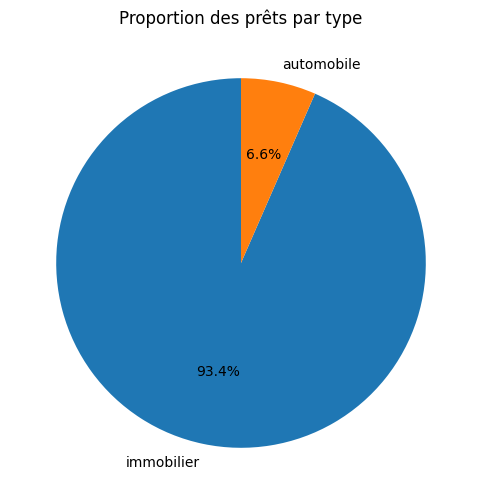

In [66]:
data = prets['type'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
plt.title("Proportion des prêts par type")
plt.show()

## 2. bénéfice mensuel réalisé en fonction du revenu du client

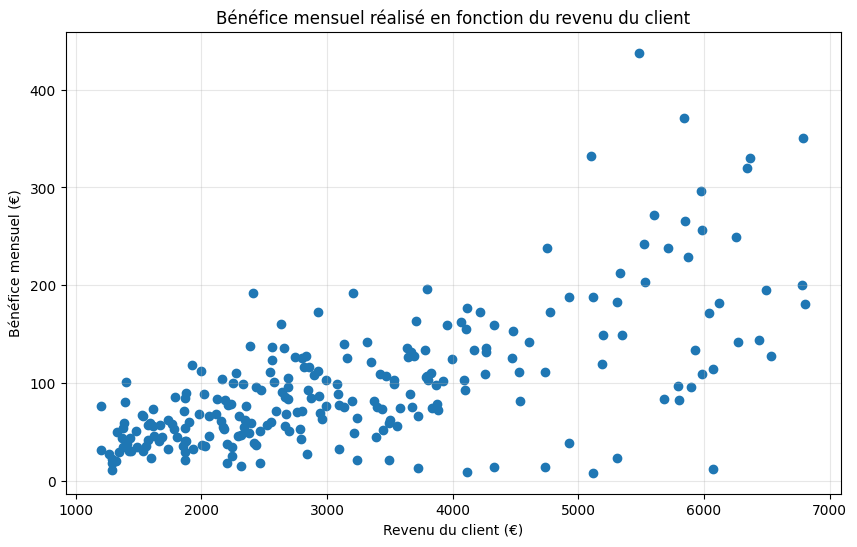

In [77]:
plt.figure(figsize=(10, 6))
# Attention à bien utiliser 'benefices' avec un "s" comme défini dans ta cellule [46]
plt.scatter(prets['revenu'], prets['benefices'])

plt.xlabel('Revenu du client (€)')
plt.ylabel('Bénéfice mensuel (€)')
plt.title("Bénéfice mensuel réalisé en fonction du revenu du client")
plt.grid(alpha=0.3)
plt.show()

## 3. La distribution des bénéfices réalisés

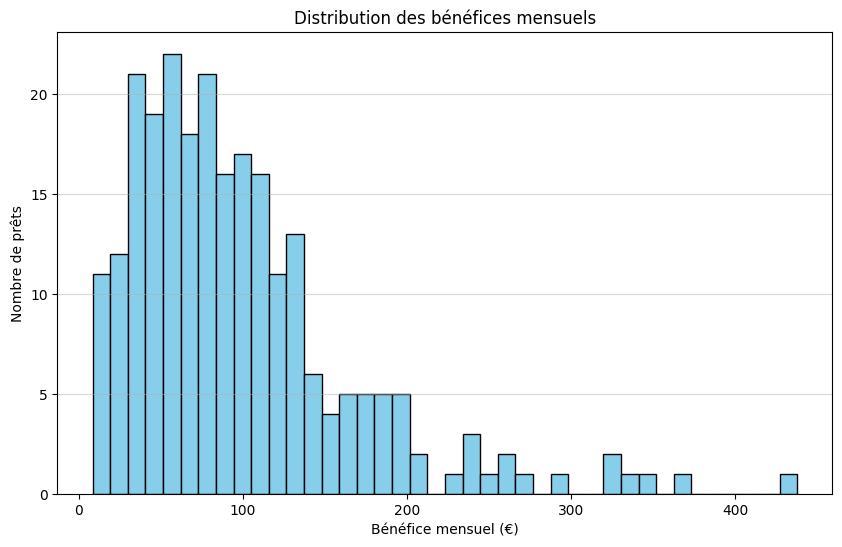

In [64]:
plt.figure(figsize=(10, 6))
# Utilisation de 'benefices' (pluriel) pour correspondre à votre création de colonne
plt.hist(prets['benefices'], bins=40, color='skyblue', edgecolor='black')
plt.xlabel('Bénéfice mensuel (€)')
plt.ylabel('Nombre de prêts')
plt.title("Distribution des bénéfices mensuels")
plt.grid(axis='y', alpha=0.5)
plt.show()

## 4. bénéfice mensuel total réalisé par agence

In [78]:
# On filtre sur la ville de Toulouse, on prend la colonne bénéfices et on fait la somme
benefice_toulouse = prets.loc[prets['ville'] == 'TOULOUSE', 'benefices'].sum()

print(f"Bénéfice mensuel total de l'agence de Toulouse : {benefice_toulouse:.2f} €")

Bénéfice mensuel total de l'agence de Toulouse : 2138.07 €


Félicitations pour être arrivé au bout ! Voici [la correction correspondante](https://colab.research.google.com/github/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/blob/main/notebooks/P3/P3C2%20-%20Tracez%20des%20graphiques%20avec%20Matplotlib%20-%20correction.ipynb).